<a href="https://colab.research.google.com/github/lutovatanya/University-Python/blob/main/RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

18.02.23. 

MNIST

In [21]:
from torchvision.datasets import MNIST
import matplotlib.pyplot  as plt
import numpy as np


In [5]:
mnist_dataset_train = MNIST('train', True, download=True)
mnist_dataset_test = MNIST('test', False, download=True)

In [10]:
len(mnist_dataset_train)

60000

In [13]:
len(mnist_dataset_test)

10000

In [14]:
mnist_dataset_test[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F88D6F3C940>, 7)

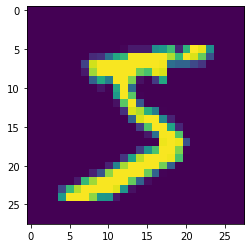

In [20]:
plt.imshow(mnist_dataset_test[0][0])

In [22]:
img_array = np.array(mnist_dataset_test[0][0])

In [23]:
img_array.shape

(28, 28)

In [24]:
np.unique(img_array)

array([  0,   1,   3,   5,   9,  14,  17,  18,  19,  21,  22,  31,  35,
        36,  38,  40,  44,  52,  57,  58,  59,  60,  61,  62,  66,  67,
        72,  75,  77,  83,  84, 106, 114, 115, 121, 126, 129, 133, 140,
       151, 159, 163, 166, 170, 182, 185, 187, 198, 203, 205, 207, 209,
       219, 221, 222, 224, 225, 227, 229, 233, 236, 238, 240, 241, 242,
       248, 249, 250, 251, 253, 254, 255], dtype=uint8)

In [25]:
from sklearn.linear_model import LogisticRegression

In [36]:
x_train = np.array([np.array(elem[0]).flatten() for elem in mnist_dataset_train])
y_train = np.array([elem[1] for elem in mnist_dataset_train])
x_test = np.array([np.array(elem[0]).flatten() for elem in mnist_dataset_test])
y_test = np.array([elem[1] for elem in mnist_dataset_test])

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [56]:
model = LogisticRegression(max_iter = 10000)
model.fit(x_train[:2000], y_train[:2000])

LogisticRegression(max_iter=10000)

In [57]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [58]:
accurancy_train = np.sum(y_train == y_pred_train) / len(y_train)
accurancy_test = np.sum(y_pred_test == y_test) / len(y_test)
accurancy_test, accurancy_train

(0.8597, 0.8588833333333333)

In [66]:
import torch
from torch import nn
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import Adam

In [63]:
mnist_dataset_train = MNIST('train', True, download=True, transform = ToTensor())
mnist_dataset_test = MNIST('test', False, download=True, transform = ToTensor())

In [65]:
mnist_dataset_test[0][0].shape, type(mnist_dataset_test[0][0])

(torch.Size([1, 28, 28]), torch.Tensor)

In [68]:
batch_size = 64
train_dataloader = DataLoader(mnist_dataset_train, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(mnist_dataset_test, batch_size = batch_size, shuffle = False)

In [69]:
for elem in train_dataloader:
  print(type(elem))
  break

<class 'list'>


In [71]:
elem[0].shape

torch.Size([64, 1, 28, 28])

In [72]:
class Mnist(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear( 28* 28, 100)
    self.lin2 = nn.Linear(100, 10)
    self.act = nn.ReLU()

  def forward(self,x):
    x = self.lin1(x)
    x = self.act(x)
    x = self.lin2(x)
    return x
    

In [82]:
net = Mnist()
criterion = CrossEntropyLoss()
optimizer = Adam(net.parameters())

In [76]:
y = net(elem[0].view(-1,784))

In [78]:
y.shape, y[0]

(torch.Size([64, 10]),
 tensor([-0.1357,  0.1816, -0.1431,  0.0198, -0.0585, -0.0513, -0.0808,  0.0724,
         -0.0539, -0.1191], grad_fn=<SelectBackward0>))

In [94]:
np.argmax(y.detach().numpy(), axis = 1)

array([1, 7, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1,
       7, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 1])

In [119]:
def fit(model, criterion, optimizer, dataloader):
  total_loss = 0
  total_accuracy = 0
  model.train(True)
  for batch in tqdm(dataloader):
    optimizer.zero_grad()
    x, y = batch[0], batch[1]
    pred = model(x.view(-1, 784))
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    total_accuracy += np.sum(np.argmax(pred.detach().numpy(), axis = 1) == y.detach().numpy())  / len(batch[0])


  return total_loss / len(dataloader), total_accuracy / len(dataloader)

In [120]:
fit(net, criterion, optimizer, train_dataloader)

100%|██████████| 938/938 [00:08<00:00, 110.31it/s]


(0.06149684253093133, 0.9816764392324094)

In [121]:
def eval (model, criterion, optimizer, dataloader):
  total_loss = 0
  total_accuracy = 0
  model.eval()
  with torch.no_grad():
    for batch in tqdm(dataloader):
      x, y = batch[0], batch[1]
      pred = model(x.view(-1, 784))
      loss = criterion(pred, y)
      
      total_loss += loss.item()
      total_accuracy += np.sum(np.argmax(pred.detach().numpy(), axis = 1) == y.detach().numpy())  / len(batch[0])
  return total_loss / len(dataloader), total_accuracy / len(dataloader)



In [122]:
eval(net, criterion, optimizer, test_dataloader)

100%|██████████| 157/157 [00:01<00:00, 132.17it/s]


(0.08456752187506426, 0.9728304140127388)

In [107]:
from tqdm import tqdm


In [124]:
net = Mnist()
criterion = CrossEntropyLoss()
optimizer = Adam(net.parameters())
for epoch in range(10):
  train_loss, train_accuracy = fit(net, criterion, optimizer, train_dataloader)
  test_loss, test_accuracy = eval(net, criterion, optimizer, test_dataloader)
  print('Train loss', train_loss, 'Train acc',  train_accuracy)
  print('Test loss', test_loss, 'Test acc', test_accuracy)

100%|██████████| 157/157 [00:01<00:00, 149.14it/s]


Train loss 0.36381031164943156 Train acc 0.9035347814498934
Test loss 0.20583188848771677 Test acc 0.9403861464968153


100%|██████████| 157/157 [00:01<00:00, 148.18it/s]


Train loss 0.17387074661820429 Train acc 0.9499766791044776
Test loss 0.14368582453288042 Test acc 0.9591958598726115


100%|██████████| 157/157 [00:01<00:00, 144.91it/s]


Train loss 0.12121563606551969 Train acc 0.96480210554371
Test loss 0.11726889322040258 Test acc 0.9653662420382165


100%|██████████| 157/157 [00:01<00:00, 148.31it/s]


Train loss 0.09258917819009597 Train acc 0.972831156716418
Test loss 0.09652404127728526 Test acc 0.9708399681528662


100%|██████████| 157/157 [00:01<00:00, 113.76it/s]


Train loss 0.07414691596538193 Train acc 0.9780450426439232
Test loss 0.08474309452747107 Test acc 0.9749203821656051


100%|██████████| 157/157 [00:01<00:00, 145.80it/s]


Train loss 0.061806974184911836 Train acc 0.9815098614072495
Test loss 0.08011405494388128 Test acc 0.9746218152866242


100%|██████████| 157/157 [00:01<00:00, 146.31it/s]


Train loss 0.05037782038959152 Train acc 0.9854577558635395
Test loss 0.08672331630921133 Test acc 0.9739251592356688


100%|██████████| 157/157 [00:01<00:00, 148.94it/s]


Train loss 0.04233751050817139 Train acc 0.9874233742004265
Test loss 0.08236740357222133 Test acc 0.9746218152866242


100%|██████████| 157/157 [00:01<00:00, 144.06it/s]


Train loss 0.03616243463666387 Train acc 0.9890891524520256
Test loss 0.07667345052568693 Test acc 0.9774084394904459


100%|██████████| 157/157 [00:01<00:00, 119.31it/s]

Train loss 0.02983290212701009 Train acc 0.9916377931769723
Test loss 0.07394192780737482 Test acc 0.977109872611465
